In [1]:
# set up the plots
import sys
sys.path.append("..")

from doc import plot_utils
from doc.sample_problem import DocProblem
plot_utils.setup()

# Sample histogram

In [6]:
import numpy as np
import pylab as plt

exampleProblem = DocProblem(norm_test_params_1 = [-11, 6.5], smearing=(5, 2))
exampleProblem.set_bins_x_ini(40, -35, 30)
exampleProblem.set_bins_b_ini(40, -35, 30)
exampleProblem.setup_example()

x_ini_gen = exampleProblem.get_initial_MC()
x_ini = np.histogram(x_ini_gen, exampleProblem.bins_x)
x_test_gen = exampleProblem.get_test_distribution()
x_test = np.histogram(x_test_gen, exampleProblem.bins_x)

scale_factor = len(x_test_gen)/len(x_ini_gen)

b_ini_gen = exampleProblem.get_initial_MC_data()
b_ini = np.histogram(b_ini_gen, exampleProblem.bins_b)
b_test_gen = exampleProblem.get_test_data()
b_test = np.histogram(b_test_gen, exampleProblem.bins_b)

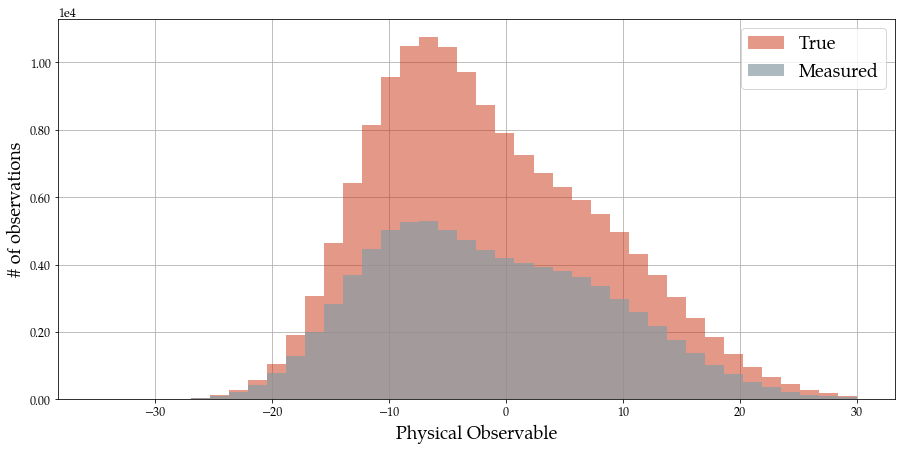

In [7]:
fig = plt.figure(figsize=(15, 7))
plot_utils.setup_font_size()

# plot histograms on the left
ax = fig.add_subplot(1,1,1)
ax.hist(x_ini_gen, density=False, bins=exampleProblem.bins_x, histtype="bar", label="True", alpha=0.5, weights=scale_factor*np.ones(len(x_ini_gen)))
ax.hist(b_ini_gen, density=False, bins=exampleProblem.bins_x, histtype="bar", 
         label="Measured", alpha=0.7, weights=scale_factor*np.ones(len(b_ini_gen)))
ax.set_xlabel("Physical Observable")
ax.set_ylabel("# of observations")
ax.yaxis.set_major_formatter(plot_utils.get_sci_decimal_format())
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.legend()
fig.savefig("./doc/images/unfolding_inversion_histograms.svg")

# What is a histogram?

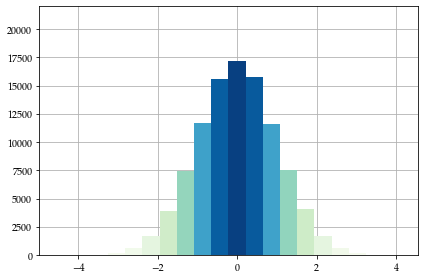

In [24]:
import numpy as np
from matplotlib import colors
import pylab as plt
from doc import plot_utils
plot_utils.setup()

# Fixing random state for reproducibility
np.random.seed(19680801)

N_points = 100000
n_bins = 20

# Generate a normal distribution, center at x=0 and y=5
x = np.random.randn(N_points)

fig, axs = plt.subplots(1, 1, tight_layout=True)
axs.grid(True)
# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs.hist(x, bins=n_bins)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.GnBu(norm(thisfrac))
    thispatch.set_facecolor(color)

#axs.set_xlim((-3,3))
axs.set_ylim((0,22000))
fig.savefig("./doc/images/what_is_histogram.svg")
